In [1]:
# import the usual
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from ipywidgets import interact, fixed
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd

Here, we put the csv files into dataframe and we try to fit them into X and Y

In [2]:
df_attendance = pd.read_csv('attendance.csv')
df_games = pd.read_csv('games.csv')

excludeYears = [2000, 2001]

# Removes any rows containing a null value from the datasets
df_attendance = df_attendance[~df_attendance['year'].isin(excludeYears)]
df_attendance = df_attendance.dropna()
droppit = ['team', 'total', 'home', 'away']
df_attendance = df_attendance.drop(droppit, axis=1)
df_attendance.rename(columns={'team_name': 'home_team_name'}, inplace=True)
df_attendance['week'] = df_attendance['week'].astype(int)

df_games = df_games[~df_games['year'].isin(excludeYears)]
droppa = ['home_team', 'away_team', 'tie', 'home_team_city', 'away_team_city']
exclude_weeks = ['WildCard', 'Division', 'ConfChamp', 'SuperBowl']
df_games = df_games.drop(droppa, axis=1)
df_games = df_games[~df_games['week'].isin(exclude_weeks)]
df_games = df_games.dropna()
df_games['week'] = df_games['week'].astype(int)

right = ['year', 'week', 'home_team_name']
df_result = df_attendance.merge(df_games, on=right)
to_convert_categorical = ['home_team_name', 'time', 'winner', 'day', 'away_team_name']

df_result[to_convert_categorical] = df_result[to_convert_categorical].astype('category')
df_result = df_result.drop('date', axis=1)

df_result_numerical = df_result.select_dtypes(include=[np.number])

correlation_matrix = df_result_numerical.corr()

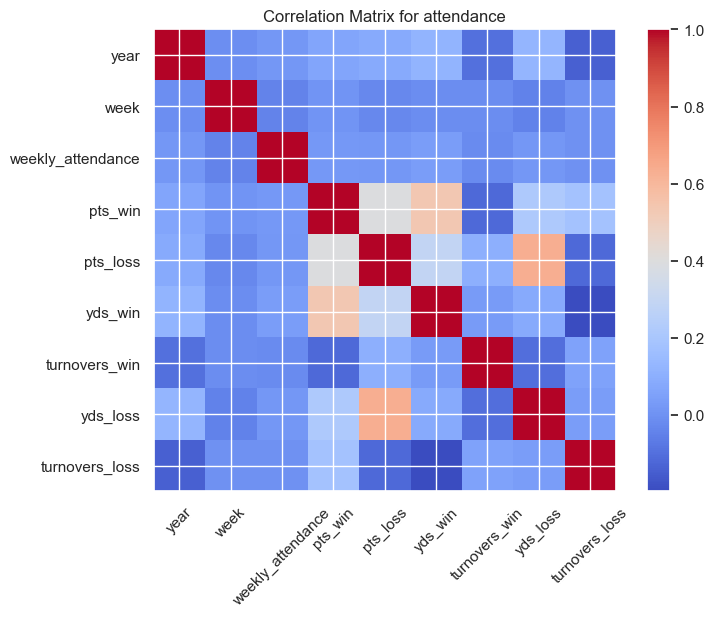

In [4]:
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Correlation Matrix for attendance")
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()


In [5]:
X = df_result.drop('weekly_attendance', axis=1)
y = df_result['weekly_attendance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = SVR()

In [ ]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.1, 0.2, 0.5]
}

In [ ]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [ ]:
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)
grid_result = grid_search.fit()

In [ ]:
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
best_model = grid_result.best_estimator_
y_pred = best_model.predict()
mse = mean_squared_error()
print("Final Mean Squared Error on Test Set:", mse)